# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [76]:
# Common imports
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


In [77]:
temps = pd.read_csv("data/temps.csv")

### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [78]:
temps.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [79]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [80]:
temps.nunique()

year                1
month              12
day                31
week                7
temp_2             56
temp_1             56
average           243
actual             55
forecast_noaa      37
forecast_acc       37
forecast_under     36
friend             66
dtype: int64

In [81]:
temps.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [82]:
temps = temps.drop(['week', 'year', 'month', 'day', 'friend', 'forecast_noaa','forecast_acc', 'forecast_under'], axis=1)

In [83]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp_2   348 non-null    int64  
 1   temp_1   348 non-null    int64  
 2   average  348 non-null    float64
 3   actual   348 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 11.0 KB


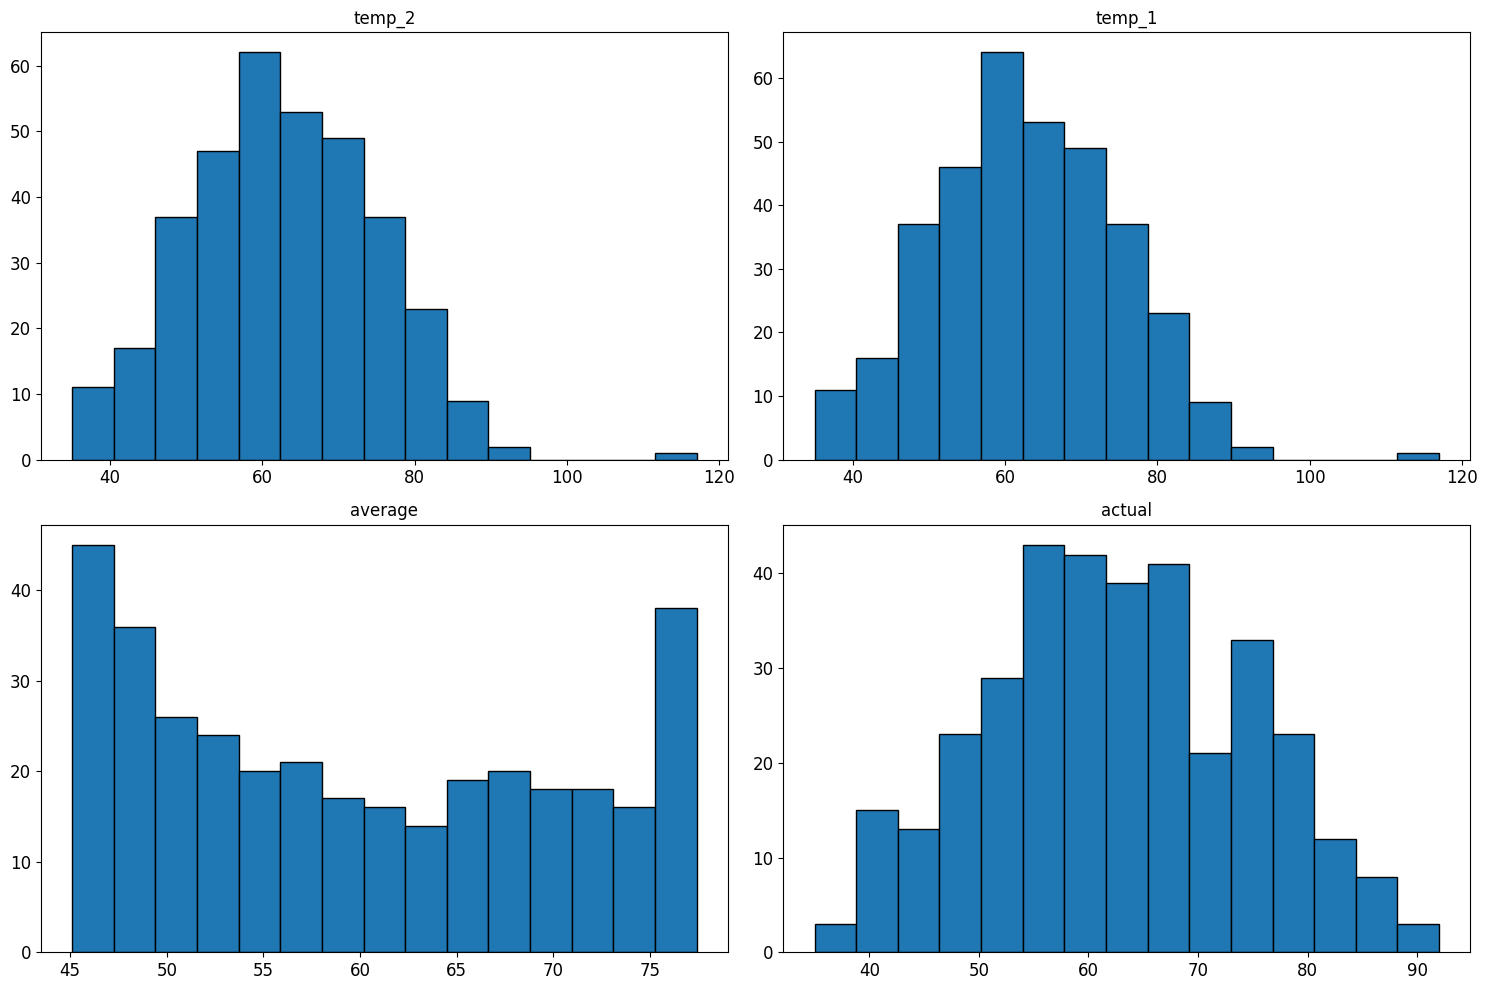

In [84]:
# Crear histogramas para todas las columnas numéricas
temps.hist(bins=15, figsize=(15, 10), edgecolor='black', grid=False)

# Ajustar el diseño para que los gráficos no se solapen
plt.tight_layout()

# Mostrar los histogramas
plt.show()


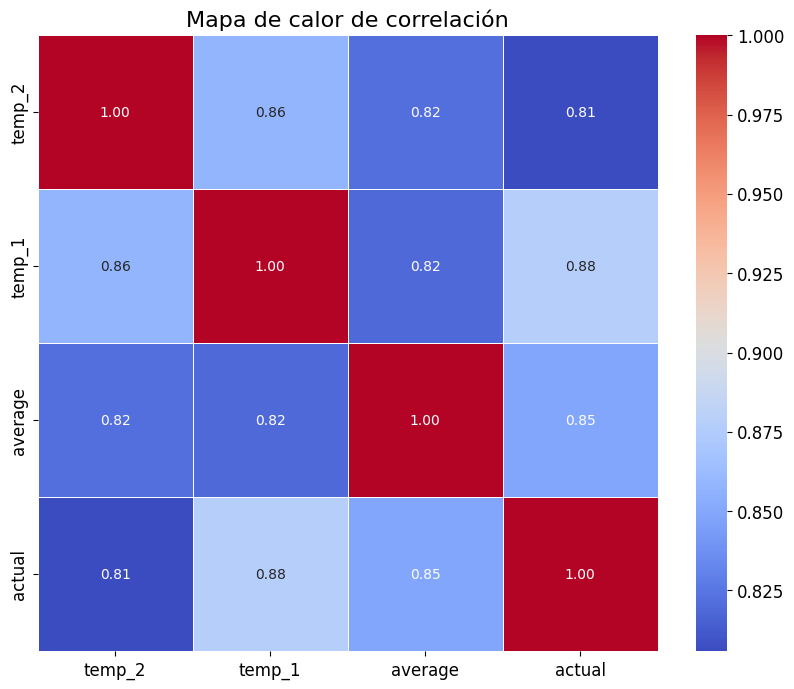

In [85]:
# Calcular la matriz de correlación
correlation_matrix = temps.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Títulos y etiquetas
plt.title('Mapa de calor de correlación', fontsize=16)
plt.show()


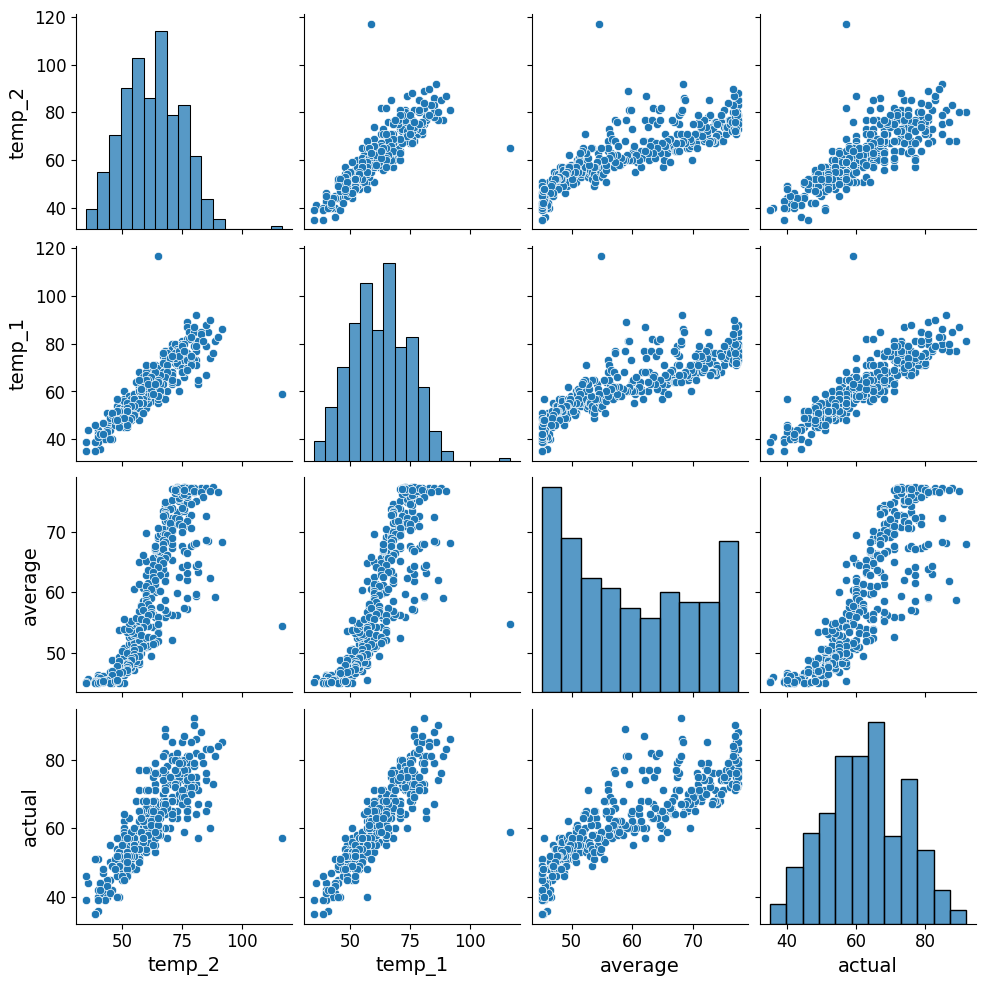

In [86]:
sns.pairplot(temps.dropna())


### 3. Selecciona variables y divide en train y test

In [116]:
X = temps.drop(columns=['actual'])
y = temps['actual']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 4. Entrena el modelo


In [118]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [119]:
predictions = tree_reg.predict(X_test)
predictions

array([74.05050505, 64.06349206, 54.47619048, 64.06349206, 64.06349206,
       74.05050505, 74.05050505, 74.05050505, 64.06349206, 74.05050505,
       64.06349206, 74.05050505, 43.375     , 64.06349206, 74.05050505,
       54.47619048, 64.06349206, 54.47619048, 54.47619048, 74.05050505,
       64.06349206, 54.47619048, 64.06349206, 64.06349206, 54.47619048,
       54.47619048, 64.06349206, 43.375     , 54.47619048, 74.05050505,
       74.05050505, 64.06349206, 54.47619048, 74.05050505, 74.05050505,
       64.06349206, 54.47619048, 54.47619048, 74.05050505, 43.375     ,
       74.05050505, 54.47619048, 74.05050505, 43.375     , 64.06349206,
       74.05050505, 54.47619048, 74.05050505, 54.47619048, 43.375     ,
       43.375     , 43.375     , 64.06349206, 64.06349206, 74.05050505,
       64.06349206, 54.47619048, 54.47619048, 54.47619048, 54.47619048,
       64.06349206, 54.47619048, 64.06349206, 74.05050505, 64.06349206,
       54.47619048, 74.05050505, 74.05050505, 74.05050505, 43.37

In [120]:
predictions_train = tree_reg.predict(X_train)
predictions_train

array([74.05050505, 54.47619048, 64.06349206, 54.47619048, 54.47619048,
       64.06349206, 43.375     , 74.05050505, 43.375     , 54.47619048,
       54.47619048, 74.05050505, 74.05050505, 74.05050505, 64.06349206,
       54.47619048, 43.375     , 74.05050505, 54.47619048, 74.05050505,
       64.06349206, 54.47619048, 54.47619048, 54.47619048, 74.05050505,
       43.375     , 43.375     , 43.375     , 74.05050505, 74.05050505,
       43.375     , 74.05050505, 74.05050505, 54.47619048, 74.05050505,
       54.47619048, 43.375     , 54.47619048, 54.47619048, 74.05050505,
       64.06349206, 54.47619048, 43.375     , 64.06349206, 64.06349206,
       64.06349206, 74.05050505, 54.47619048, 54.47619048, 54.47619048,
       54.47619048, 43.375     , 64.06349206, 64.06349206, 54.47619048,
       43.375     , 43.375     , 64.06349206, 74.05050505, 43.375     ,
       64.06349206, 74.05050505, 54.47619048, 64.06349206, 74.05050505,
       74.05050505, 54.47619048, 74.05050505, 74.05050505, 64.06

### 5. Evaluación de tu modelo

Calcula el MAE, MAPE, MSE y RMSE.

In [121]:
from sklearn import metrics

In [122]:
print('MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, predictions_train))
print('MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))

MAE: 4.191991861056609
MAPE: 0.06815683252257974
MSE: 28.62210750879816
RMSE: 5.349963318453516


In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.888811585240156
MAPE: 0.07740495191086964
MSE: 37.64787660374395
RMSE: 6.135786551351338


### 6. Representa el árbol de decisión

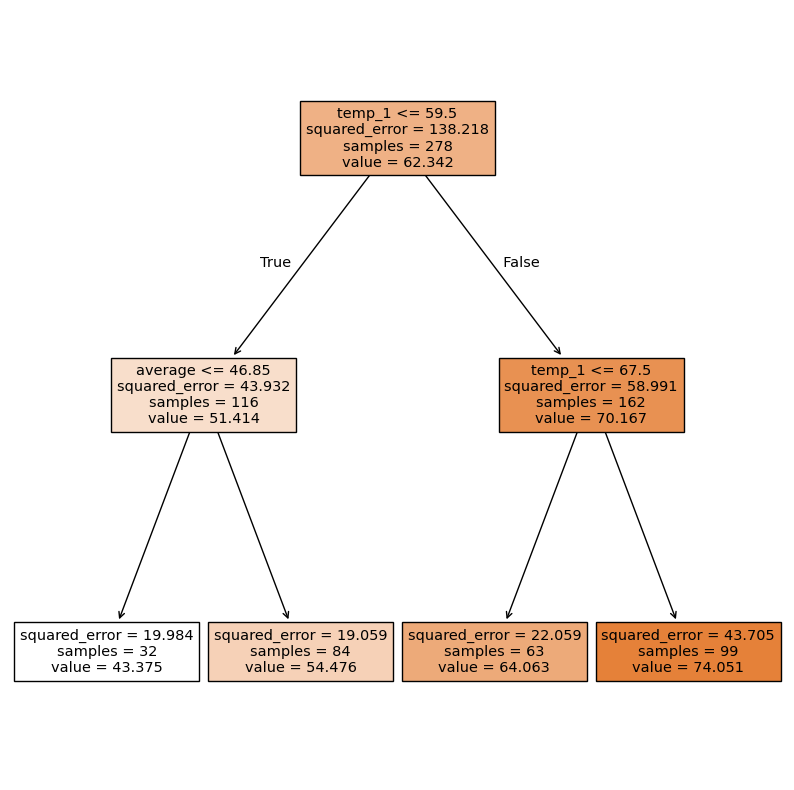

In [124]:
from sklearn.tree import plot_tree

# Suponiendo que el DataFrame se llama 'temps' y contiene las características del modelo
feature_names = temps.columns  # Los nombres de las columnas del DataFrame

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 10))
plot_tree(
    tree_reg,
    feature_names=feature_names,  # Usamos las columnas del DataFrame como nombres de características
    class_names=["Clase 0", "Clase 1"],  # Modifica según las clases en tu problema
    filled=True
)
plt.show()


### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [125]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [126]:
predictions = tree_reg.predict(X_test)
predictions

array([72.37681159, 61.37037037, 52.44444444, 66.08333333, 66.08333333,
       72.37681159, 77.9       , 77.9       , 61.37037037, 72.37681159,
       61.37037037, 72.37681159, 41.05882353, 61.37037037, 72.37681159,
       58.13333333, 61.37037037, 52.44444444, 58.13333333, 72.37681159,
       66.08333333, 58.13333333, 66.08333333, 61.37037037, 58.13333333,
       52.44444444, 66.08333333, 46.        , 58.13333333, 77.9       ,
       72.37681159, 66.08333333, 58.13333333, 77.9       , 77.9       ,
       61.37037037, 52.44444444, 52.44444444, 72.37681159, 46.        ,
       72.37681159, 52.44444444, 72.37681159, 41.05882353, 61.37037037,
       72.37681159, 52.44444444, 77.9       , 52.44444444, 41.05882353,
       46.        , 41.05882353, 66.08333333, 66.08333333, 72.37681159,
       61.37037037, 58.13333333, 58.13333333, 52.44444444, 58.13333333,
       66.08333333, 52.44444444, 61.37037037, 72.37681159, 61.37037037,
       58.13333333, 72.37681159, 72.37681159, 77.9       , 41.05

In [127]:
predictions_train = tree_reg.predict(X_train)
predictions_train

array([72.37681159, 58.13333333, 61.37037037, 52.44444444, 52.44444444,
       66.08333333, 46.        , 77.9       , 46.        , 52.44444444,
       52.44444444, 72.37681159, 72.37681159, 72.37681159, 66.08333333,
       58.13333333, 46.        , 72.37681159, 58.13333333, 77.9       ,
       66.08333333, 52.44444444, 52.44444444, 52.44444444, 77.9       ,
       41.05882353, 41.05882353, 46.        , 77.9       , 72.37681159,
       41.05882353, 72.37681159, 72.37681159, 52.44444444, 77.9       ,
       58.13333333, 41.05882353, 52.44444444, 58.13333333, 72.37681159,
       61.37037037, 52.44444444, 41.05882353, 66.08333333, 61.37037037,
       66.08333333, 72.37681159, 58.13333333, 52.44444444, 52.44444444,
       52.44444444, 41.05882353, 61.37037037, 66.08333333, 52.44444444,
       41.05882353, 46.        , 66.08333333, 72.37681159, 46.        ,
       66.08333333, 72.37681159, 52.44444444, 61.37037037, 77.9       ,
       72.37681159, 52.44444444, 72.37681159, 77.9       , 61.37

In [128]:
tree_reg.score(X_test, y_test)

0.7786776796296856

### 8. Vuelve a evaluar tu modelo

In [129]:
print('MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, predictions_train))
print('MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))

MAE: 3.675752083754991
MAPE: 0.05874668452706153
MSE: 22.14996536445183
RMSE: 4.706374970659672


In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.267242249556827
MAPE: 0.0674392768128964
MSE: 30.946461197509944
RMSE: 5.5629543587476915


### 9. Vuelve a representar su árbol

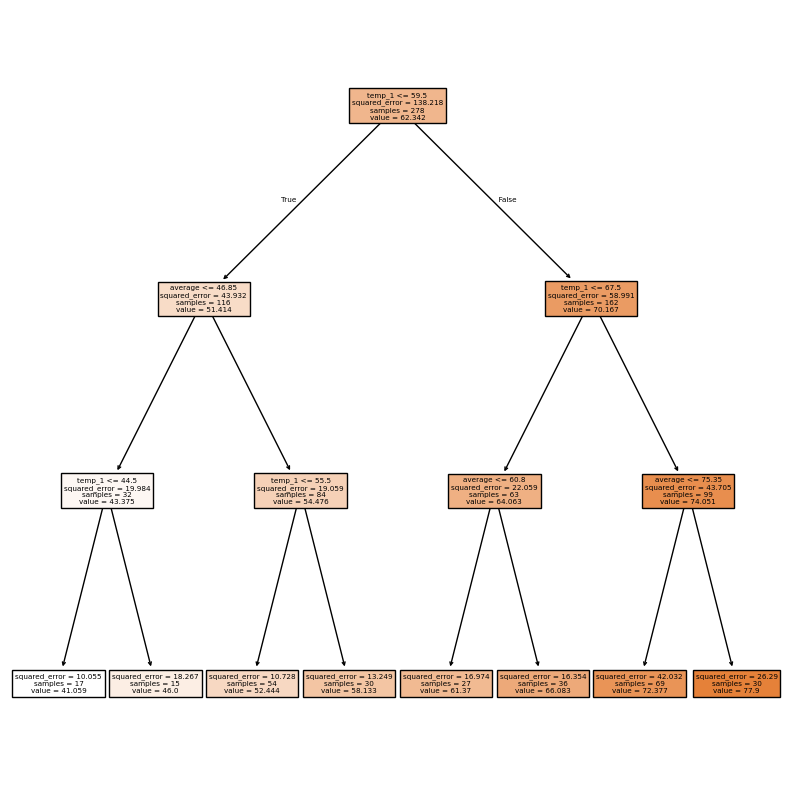

In [131]:
from sklearn.tree import plot_tree

# Suponiendo que el DataFrame se llama 'temps' y contiene las características del modelo
feature_names = temps.columns  # Los nombres de las columnas del DataFrame

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 10))
plot_tree(
    tree_reg,
    feature_names=feature_names,  # Usamos las columnas del DataFrame como nombres de características
    class_names=["Clase 0", "Clase 1"],  # Modifica según las clases en tu problema
    filled=True
)
plt.show()

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define el modelo base
regressor = DecisionTreeRegressor(random_state=42)

# Define el rango de hiperparámetros para el Grid Search
param_grid = {
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"]
}

# Configura el Grid Search con Cross-Validation
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # Métrica a optimizar
    cv=5,  # Número de divisiones de Cross-Validation
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajusta el modelo con los datos
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (neg MSE):", grid_search.best_score_)

# EXtraer el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento (opcional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE en los datos de entrenamiento:", mse)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Mejores hiperparámetros: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mejor puntuación (neg MSE): -27.53075040854888
MSE en los datos de entrenamiento: 27.68331479511541


C:\Users\mikel\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [133]:
tree_reg.feature_importances_

array([0.        , 0.88110924, 0.11889076])

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [134]:
tree_reg.

SyntaxError: invalid syntax (1199237061.py, line 1)